In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [3]:
data_dir = 'D:\drowsing'

In [4]:
os.listdir(data_dir)

['test dataset', 'train dataset']

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir+'\\test dataset\\'
train_path = data_dir+'\\train dataset\\'

In [7]:
test_path

'D:\\drowsing\\test dataset\\'

In [8]:
os.listdir(test_path)

['close eye', 'open eye']

In [9]:
os.listdir(train_path)

['close eye', 'open eye']

In [10]:
#os.listdir(train_path+'close eye')

In [11]:
#get the first one
os.listdir(train_path+'close eye')[0]

's0001_00001_0_0_0_0_0_01.png'

In [12]:
close_eye_path = train_path+'close eye\\'+'s0001_00001_0_0_0_0_0_01.png'

In [13]:
close_eye_path

'D:\\drowsing\\train dataset\\close eye\\s0001_00001_0_0_0_0_0_01.png'

In [14]:
imread(close_eye_path)

array([[0.14901961, 0.16078432, 0.17254902, ..., 0.34901962, 0.34901962,
        0.34901962],
       [0.14901961, 0.16078432, 0.17254902, ..., 0.36078432, 0.36078432,
        0.35686275],
       [0.14901961, 0.16078432, 0.16862746, ..., 0.36862746, 0.3647059 ,
        0.3647059 ],
       ...,
       [0.20392157, 0.21176471, 0.23529412, ..., 0.30588236, 0.30588236,
        0.3137255 ],
       [0.2       , 0.20784314, 0.23137255, ..., 0.31764707, 0.31764707,
        0.31764707],
       [0.2       , 0.2       , 0.21568628, ..., 0.3137255 , 0.3137255 ,
        0.32156864]], dtype=float32)

In [15]:
imread(close_eye_path).shape

(86, 86)

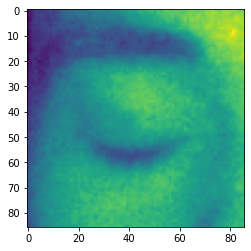

In [16]:
plt.imshow(imread(close_eye_path))

In [17]:
os.listdir(train_path+'open eye')[5]

's0001_01847_0_0_1_0_0_01.png'

In [18]:
openeyePath = train_path+'open eye\\'+'s0001_01847_0_0_1_0_0_01.png'

In [19]:
imread(openeyePath).shape

(78, 78)

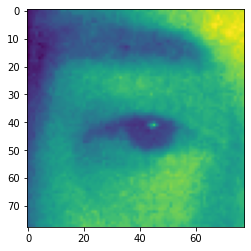

In [20]:
plt.imshow(imread(openeyePath))

In [21]:
#check how many image in train
len(os.listdir(train_path+'open eye'))

21936

In [22]:
#check how many image in test
len(os.listdir(train_path+'close eye'))

21936

In [23]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'open eye'):
    img  = imread(test_path+'open eye\\'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [24]:
#dim1

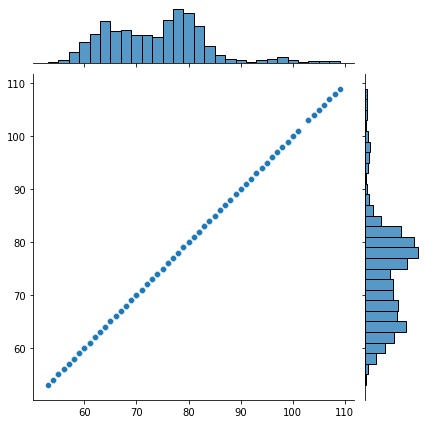

In [25]:
sns.jointplot(x=dim1,y=dim2)

In [26]:
np.mean(dim1)

73.18168604651163

In [27]:
np.mean(dim2)

73.18168604651163

In [28]:
image_shape = (73,73,3)

In [29]:
73*73*1

5329

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
imread(openeyePath).max()

0.38431373

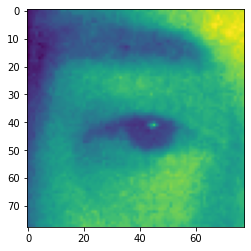

In [32]:
para_img = imread(openeyePath)
plt.imshow(para_img)

In [33]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                               
                              )

In [34]:
#plt.imshow(image_gen.random_transform(openeyePath))

In [35]:
image_gen.flow_from_directory(train_path)

Found 43872 images belonging to 2 classes.


In [36]:
image_gen.flow_from_directory(test_path)

Found 4128 images belonging to 2 classes.


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [38]:
#what is image_shape its in line no 27
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape= image_shape,activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape= image_shape,activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape= image_shape,activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 71, 71, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [42]:
batch_size=18
image_shape 

(73, 73, 3)

In [43]:
image_shape[:2]

(73, 73)

In [44]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                                color_mode='rgb',batch_size=batch_size,
                                                class_mode='binary'
                                               )

Found 43872 images belonging to 2 classes.


In [45]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                                color_mode='rgb',batch_size=batch_size,
                                                class_mode='binary',shuffle=False
                                               )

Found 4128 images belonging to 2 classes.


In [46]:
train_image_gen.class_indices

{'close eye': 0, 'open eye': 1}

In [47]:
#results = model.fit(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model = load_model('drowsinessModel.h5')

In [50]:
#pd.DataFrame(model.history.history)

In [51]:
#losses = pd.DataFrame(model.history.history)

In [52]:
#losses[['loss','val_loss']].plot()

In [53]:
#losses[['accuracy','val_accuracy']].plot()

In [54]:
model.metrics_names

['loss', 'accuracy']

In [55]:
model.evaluate(test_image_gen)

230/230 [==============================] - 22s 91ms/step - loss: 0.1656 - accuracy: 0.9467


[0.1656036674976349, 0.9467054009437561]

In [56]:
from tensorflow.keras.preprocessing import image

In [57]:
pred_probabilities = model.predict(test_image_gen)

In [58]:
pred_probabilities

array([[1.0955930e-03],
       [9.7107589e-03],
       [8.4573030e-04],
       ...,
       [4.7101989e-01],
       [8.4021467e-01],
       [9.2074823e-01]], dtype=float32)

In [59]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [60]:
predictions = pred_probabilities > 0.7

In [61]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2064
           1       1.00      0.83      0.91      2064

    accuracy                           0.91      4128
   macro avg       0.93      0.91      0.91      4128
weighted avg       0.93      0.91      0.91      4128



In [64]:
confusion_matrix(test_image_gen.classes,predictions)

array([[2056,    8],
       [ 344, 1720]], dtype=int64)

In [65]:
os.listdir(test_path+'close eye')[0]

's0019_01088_0_0_0_0_1_01.png'

In [66]:
close_eye_path_test = test_path+'close eye\\'+'s0019_01088_0_0_0_0_1_01.png'

In [67]:
close_eye_path_test

'D:\\drowsing\\test dataset\\close eye\\s0019_01088_0_0_0_0_1_01.png'

In [68]:
my_image = image.load_img(close_eye_path_test,target_size=image_shape)

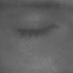

In [69]:
my_image

In [70]:
type(my_image)

PIL.Image.Image

In [71]:
my_image = image.img_to_array(my_image)

In [72]:
my_image.shape

(73, 73, 3)

In [73]:
my_image = np.expand_dims(my_image, axis=0)

In [74]:
my_image.shape

(1, 73, 73, 3)

In [75]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [76]:
train_image_gen.class_indices

{'close eye': 0, 'open eye': 1}

In [77]:
mySecondImage = image.load_img('_15.jpg',target_size=image_shape)

mySecondImage = image.img_to_array(mySecondImage)
mySecondImage = np.expand_dims(mySecondImage, axis=0)
predict = model.predict(mySecondImage)
print(predict[0][0])

1.0


In [78]:
train_image_gen.class_indices

{'close eye': 0, 'open eye': 1}

In [79]:
import cv2
from cv2 import VideoCapture

In [80]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [81]:
mySecondImage = image.load_img('sadImage.jpg',target_size=image_shape)
mySecondImage = image.img_to_array(mySecondImage)

In [82]:
gray = cv2.cvtColor(mySecondImage,cv2.COLOR_BGR2RGB)

In [83]:
!pip install pygame
from pygame import mixer

pygame 2.1.0 (SDL 2.0.16, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [87]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time
mixer.init()
sound = mixer.Sound('alarm.wav')
face = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
leye = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_righteye_2splits.xml')
lbl=['Close','Open']
#model = load_model('models/cnncat2.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[73]
lpred=[73]
while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye = reye.detectMultiScale(gray)
    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )
    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(73,73))
        r_eye= r_eye/255
        r_eye= r_eye.reshape(73,73,3)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = model.predict(r_eye)
        if(rpred[0][0]>=1):
            lbl='Open'
        if(rpred[0][0]<=0):
            lbl='Closed'
        break
    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)
        l_eye = cv2.resize(l_eye,(73,73))
        l_eye= l_eye/255
        l_eye=l_eye.reshape(73,73,3)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = model.predict(l_eye)
        if(lpred[0][0]>=1):
            lbl='Open'
        if(lpred[0][0]<=0):
            lbl='Closed'
        break
    if(rpred[0][0]<=0 and lpred[0][0]<=0):
        score=score+1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    else:
        score=score-1
        cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score<0):
        score=0
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
            sound.play()
        except: # isplaying = False
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

TypeError: 'int' object is not subscriptable

In [ ]:
mixer.init()
sound = mixer.Sound('alarm.wav')
cap = cv2.VideoCapture(0)
Score=0;
while True:
    ret,frame = cap.read();
    height,width = frame.shape[0:2]
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    faces= faceCascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=3)
    eyes= eyeCascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=2)
    
    cv2.rectangle(frame, (0,height-50),(200,height),(0,0,0),thickness=cv2.FILLED)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,pt1=(x,y),pt2=(x+w,y+h),color=(0,255,0),thickness=3)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(frame,pt1=(ex,ey),pt2=(ex+ew,ey+eh),color=(0,255,0),thickness=3)
        # preprocessing steps
        eye= frame[ey:ey+eh,ex:ex+ew]
        #eye = image.load_img(frame[ey:ey+eh,ex:ex+ew],target_size=image_shape)
        #eye = image.img_to_array(eye)
        eye= cv2.resize(eye,(73,73))
        
        eye= eye/255
        eye= eye.reshape(73,73,3)
       
        eye= np.expand_dims(eye,axis=0)
       
        
        # preprocessing is done now model prediction
        prediction = model.predict(eye)
        print(prediction)
        
        
         # if eyes are closed
        if prediction[0][0]>0.33:
            cv2.putText(frame,'closed',(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            cv2.putText(frame,'Score'+str(Score),(100,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            Score=Score+1
            if(Score>15):
                try:
                    sound.play()
                except:
                    pass
         # if eyes are open
        if prediction[0][0]<=0:
            cv2.putText(frame,'open',(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)      
            cv2.putText(frame,'Score'+str(Score),(100,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            Score = Score-1
            if (Score<0):
                Score=0
        
        
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(33) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()